In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.transforms import Affine2D
import matplotlib as mpl
from matplotlib.collections import PatchCollection
%matplotlib inline

In [2]:
log = np.loadtxt("./test_check.log")
log.shape

(17250L, 6L)

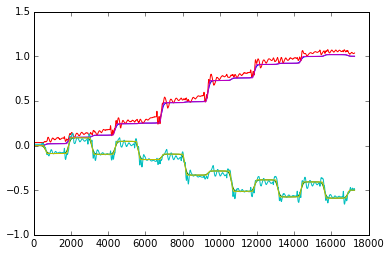

In [3]:
plt.plot(log)

In [4]:
trajectory = np.loadtxt("./0.traj", delimiter=',')

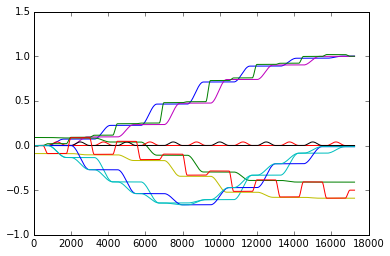

In [5]:
plt.plot(trajectory)

In [6]:
trajectory.shape

(17250L, 11L)

In [7]:
def isclose(a, b, rel_tol=1e-09, abs_tol=0.0):
    return abs(a-b) <= max(rel_tol * max(abs(a), abs(b)), abs_tol)

C:\Users\Artur\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


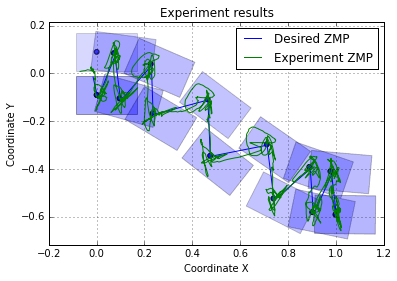

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Coordinate X')
ax.set_ylabel('Coordinate Y')
ax.set_title('Experiment results')
feet_x = 0.254;
feet_y = 0.160;
zmp_x_offset=0.04;
strange_offset = 0.015;
plt.grid(True)
zmp_desired, = plt.plot(trajectory[:,8] - strange_offset, trajectory[:,9] - strange_offset)
zmp_experiment, = plt.plot(log[:,2] - 0.05, log[:,3])
plt.axes().set_aspect('equal', 'datalim')

feets = []
centers = []
for i in xrange(0,trajectory.shape[0], trajectory.shape[0]/100):  
    center_t = mpl.transforms.Affine2D().translate(-feet_x/2 + zmp_x_offset,-feet_y/2)
    # Left feet
    if (isclose(trajectory[i, 2], 0.0)):      
        p_left = patches.Rectangle((trajectory[i, 0], trajectory[i, 1]), feet_x, feet_y)
        t_left = center_t + mpl.transforms.Affine2D().rotate_around(trajectory[i, 0], trajectory[i, 1], trajectory[i, 3])
        p_left.set_transform(t_left)
        feets.append(p_left)
        center_left = plt.Circle((trajectory[i, 0], trajectory[i, 1]), radius=0.01)    
        centers.append(center_left) 
    # Right feet
    if (isclose(trajectory[i, 6], 0)):        
        p_right = patches.Rectangle((trajectory[i, 4], trajectory[i, 5]), feet_x, feet_y)
        t_left = center_t + mpl.transforms.Affine2D().rotate_around(trajectory[i, 4], trajectory[i, 5], trajectory[i, 7])
        p_right.set_transform(t_left)
        feets.append(p_right)
        center_right = plt.Circle((trajectory[i, 4], trajectory[i, 5]), radius=0.01)    
        centers.append(center_right)  
        
feet_col = PatchCollection(feets, alpha=0.03)
center_col = PatchCollection(centers, alpha=0.2)
ax.add_collection(feet_col)
ax.add_collection(center_col)
plt.legend([zmp_desired,zmp_experiment], ["Desired ZMP", "Experiment ZMP"])
plt.show()